In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [23]:
df = pd.read_csv("/Users/juman/Downloads/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [24]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [9]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [10]:
df[['order_amount','total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


The average of the order_amount is 3145.13, the same value given in question 1 for the AOV.
There must be a shop that is selling luxury priced sneakers that is driving the average price up or a store is selling a ridiculous amount of sneakers compared to the other shops.
I will investigate further.

In [11]:
df.shape

(5000, 7)

In [26]:
#make copy of data of dataframe
df_copy = df.copy()
#create column calculating cost of one purchase at each store
df_copy['unit_price'] = df_copy['order_amount']/df_copy['total_items']
#show the information
df_copy['unit_price'].head(5)

0    112.0
1     90.0
2    144.0
3    156.0
4    156.0
Name: unit_price, dtype: float64

It can be seen that the first 5 shops have an average unit price ranging from $90 to $156.
Therefore, a store must be selling sneakers at a much higher price resulting in the spiked value of the AOV.

Let's quickly look at the average unit price of sneakers per the first 100 stores.

In [47]:
for i in range(100,5000,100):
    print("avg price of first "  + str(i) + ": " + str(np.mean(df_copy['unit_price'].head(i))))

avg price of first 100: 153.44
avg price of first 200: 277.425
avg price of first 300: 235.75333333333333
avg price of first 400: 213.61
avg price of first 500: 304.366
avg price of first 600: 321.73333333333335
avg price of first 700: 370.20428571428573
avg price of first 800: 343.23375
avg price of first 900: 322.2788888888889
avg price of first 1000: 305.552
avg price of first 1100: 314.8263636363636
avg price of first 1200: 322.76666666666665
avg price of first 1300: 348.59846153846155
avg price of first 1400: 353.08142857142855
avg price of first 1500: 373.796
avg price of first 1600: 376.405625
avg price of first 1700: 363.0241176470588
avg price of first 1800: 351.22222222222223
avg price of first 1900: 340.62315789473683
avg price of first 2000: 331.5285
avg price of first 2100: 323.2319047619048
avg price of first 2200: 315.665
avg price of first 2300: 319.8569565217391
avg price of first 2400: 312.82958333333335
avg price of first 2500: 337.0672
avg price of first 2600: 359.4

The unit price doubles from the first 100 stores to the 2nd hundred. And only goes up towards the end.

Let's calculate Calculate the average unit price for all stores in the dataset:

In [51]:
np.mean(df_copy['unit_price'])

387.7428

The average unit price of 387.74 is much higher (almost double) the first unit price of the 100 stores seen before. 
There must be a difference in the unit price among the stores.
Let's investigate this further and make a visual of the unit price of each store.

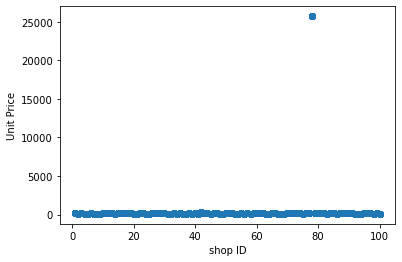

In [14]:
plt.scatter(df_copy.shop_id,df_copy.unit_price)
plt.xlabel("shop ID")
plt.ylabel("Unit Price")
plt.show()

There it is! There is anomaly among the unit price. This anomaly must be ignored to get a more accurate AOV.

Let's get the shop_id of the store(s) that have a unit price greater than 5000 and ignore them in future calculations.

In [50]:
df_copy.groupby(df_copy['shop_id'])['unit_price'].mean().reset_index().sort_values(by=['unit_price'],ascending=False).head()

,shop_id,unit_price
77,78,25725.0
41,42,352.0
11,12,201.0
88,89,196.0
98,99,195.0


The unit price of shop_id = 78 is the anomaly when it comes to the unit price among all the stores. It is the only shop that has a unit price greater than $5000.

And the difference between the highest unit price and the 2nd highest is more than $25000.

Let's calculate the average price without the data from store with shop_id = 78.

In [16]:
np.mean(df_copy[df_copy['shop_id']!=78]['unit_price'])

152.47557529269278

We see that the unit price goes down to $152.48.
Let's calculate the AOV again and see if the average order price also decreases.

In [52]:
np.mean(df_copy[df_copy['shop_id']!=78]['order_amount'])

2717.3677836092047

The AOV did go down but it is clear that an average order amount of $2717.37 is also not an afforable number.
There must a store that is outselling the other stores but a large amount.
Let's investigate further.

Let's look at the data one more time. Lets look at the average number of orders per each store.

<AxesSubplot:xlabel='shop_id'>

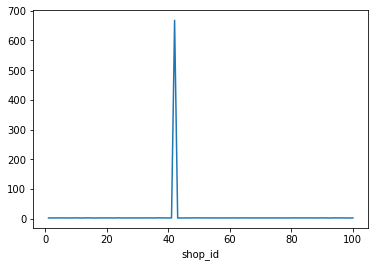

In [98]:
df_copy.groupby('shop_id')['total_items'].mean().plot()

From the plot above, it is clear that the average number of items sold per order for the majority of shops is close to 1 and there is a shop selling close to 700 units per month.
We see there is another anomaly when it comes to the number of units sold in each store.
This anomaly must also be disregarded and the data looked at again.

Let's calculate the average number of units sold for all shops:

In [96]:
np.mean(df_copy['total_items'])

8.7872

Another value that is unrealistic, it is not usual for people to purchase an average of 8 pairs of sneakers per order.
The anomaly must be removed.

In [95]:
df_copy.groupby(df_copy['shop_id'])['total_items'].mean().reset_index().sort_values(by=['total_items'],ascending=False).head()

,shop_id,total_items
41,42,667.901961
36,37,2.395833
23,24,2.290909
89,90,2.265306
9,10,2.245283


Store with shop_id=42 must be disregarded. The units purchased per store is 667.9 while the next highest is 2.4.

Now let's calculate the average cost of pair of shoes when disregarding shop ID of 42 and 78.

In [99]:
df_filtered = df_copy[(df_copy['shop_id'] != 42) & (df_copy['shop_id'] != 78)]
np.mean(df_filtered['order_amount'])

300.1558229655313

Let's calculate the average number of items purchased.

In [100]:
np.mean(df_filtered['total_items'])

1.9957169080155006

This is a much more realistic result. On average a customer purchases 2 pairs of shoes with each purchase.

In conclusion, customers spend on average $300 on each pair of shoes and purchase 2 pairs of shoes per visit. 

Question 1. Part b.

Let's look all the data again and try to get a realistic AOV without having to disregard any data.
Looking at the median of the order amount is the simplest way to get a realistics AOV values that automatically ignores anomalies.

In [101]:
df_copy['order_amount'].median()

284.0